🔍 Logistic Regression: A Complete Overview
Logistic Regression is a supervised learning algorithm used for binary classification tasks. Unlike linear regression which predicts continuous values, logistic regression predicts probabilities and maps them to class labels (0 or 1) using a sigmoid function.


📌 1. Use Case Examples
Email spam detection (Spam / Not Spam)

Tumor classification (Malignant / Benign)

Bank loan approval (Yes / No)

Customer churn (Will leave / Won't leave)


 2. Hypothesis Function
The model predicts probability using a sigmoid (logistic) function:

hθ(x)=σ(θTx)= 1/1+exp(−θT)x

θ = model parameters (weights)
x = input features
σ = sigmoid function

Output: 𝑃(𝑦=1∣𝑥;𝜃)



📌 3. Decision Rule:-

If ℎ𝜃(𝑥)≥0.5⇒𝑦=1  
If ℎ𝜃(𝑥)<0.5⇒𝑦=0


📌 4. Loss Function: Binary Cross Entropy:-
𝐿(ℎ𝜃(𝑥),𝑦)=−𝑦log⁡(ℎ𝜃(𝑥))−(1−𝑦)log(1−ℎ𝜃(𝑥))
The goal is to minimize the total loss across all training examples.

📌 5. Gradient Descent (Training the Model)
We update the weights using gradient descent:
𝜃𝑗:=θj−α ∂j(θ)/∂θj
​

Where:
α = learning rate
J(θ) = cost function

Partial derivative:
∂j(θ)/∂θj= 1/m[∑i=1tom  (hθ(x(i))−y(i))xj(i) ]
​

📌 6. Sigmoid Function:-

(Always between 0 and 1)
σ(z)= 1/1+exp(−z)

It maps any real number to a value between 0 and 1, which we interpret as probability.

📌 7. Multiclass Extension: Softmax Regression
If there are more than 2 classes:

Use Softmax Regression (also called Multinomial Logistic Regression)



📌 9. Advantages
Simple and interpretable

Fast to train
Works well with linearly separable data
Outputs probabilities



10. Limitations
Assumes linear boundary in feature space
Poor performance on complex relationships
Sensitive to imbalanced data



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification,make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
X,y = make_classification(n_samples=500,n_features=2,n_informative=2,n_redundant=0,random_state=42)

In [4]:
X.shape

(500, 2)

In [5]:
y

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,

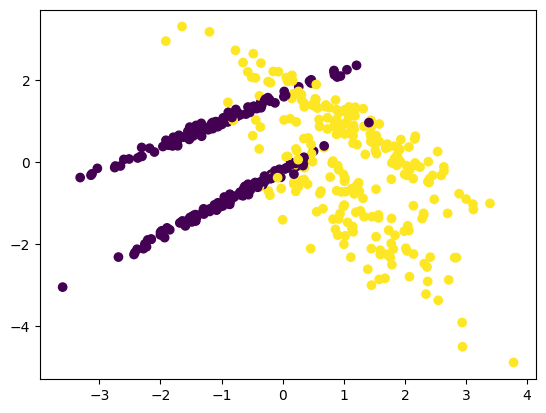

In [6]:
plt.scatter(X[:,0],X[:,1],c = y)
plt.show()

In [9]:
class LogisticRegression:
    def __init__(self,lr = 0.01):
        self.lr = lr
        
    def fit(self,X,y,epochs = 100):
        self.w, self.w0 = self.gradientDescent(X,y,self.lr,epochs)

    def hypothesis(self,x,w,w0):
        return self.sigmoid(w.dot(x.T) + w0)

    def sigmoid(self,z):
        return 1/(1+np.exp(-z))

    def loss(self,x,w,w0,y):
        ypred = self.hypothesis(x,w,w0)
        return -np.sum(y*np.log2(ypred) + (1-y)*np.log2(1-ypred))

    def predict(self,X):
        ypred = self.hypothesis(X,self.w,self.w0)
        ypred[ypred >= 0.5] = 1
        ypred[ypred < 0.5] = 0
        return ypred

    def gradientDescent(self,X,y,lr = 0.01,epochs = 100):
        w = np.zeros(shape=(X.shape[1],))
        w0 = 1
        self.loss_e = [self.loss(X,w,w0,y)]
        for e in range(epochs):
            ypred = self.hypothesis(X,w,w0)
            grads = grads = (ypred-y)@X
            w = w - lr*grads
            w0 = w0 - lr*np.mean(ypred-y)

            self.loss_e.append(self.loss(X,w,w0,y))
            
        return w,w0
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [11]:
clf = LogisticRegression(lr = 0.01)
clf.fit(x_train,y_train,2000)

In [12]:
ypred = clf.predict(x_train)
print(accuracy_score(y_train,ypred))

0.9025


In [13]:
ypred = clf.predict(x_test)
print(accuracy_score(y_test,ypred))

0.82


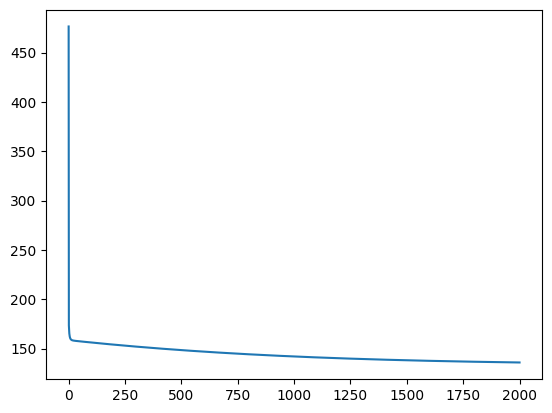

In [14]:
plt.plot(clf.loss_e)
plt.show()

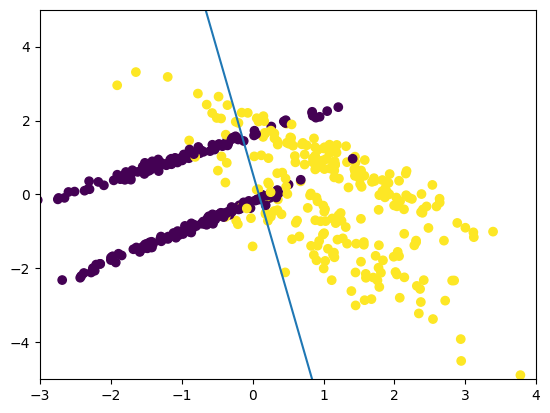

In [15]:
clf = LogisticRegression(lr = 0.01)
clf.fit(x_train,y_train,100000)
x1 = np.linspace(-3,4,1000)
x2 =-(clf.w[0]*x1 + clf.w0)/clf.w[1]
plt.plot(x1,x2)
plt.scatter(X[:,0],X[:,1],c = y)
plt.xlim(-3,4)
plt.ylim(-5,5)
plt.show()


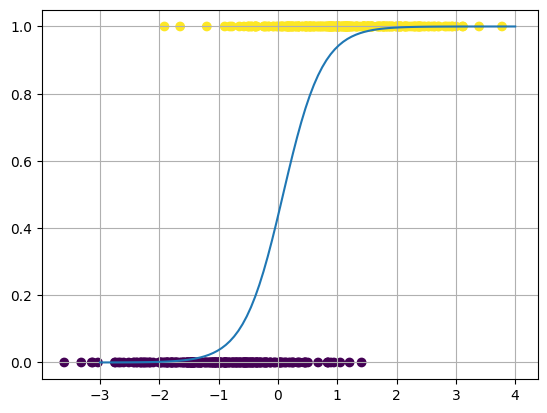

In [16]:
x1 = np.linspace(-3,4,100)
plt.scatter(X[:,0],y,c=y)
plt.plot(x1,1/(1+np.exp(-1*(clf.w[0]*x1+clf.w0))))
plt.grid()
plt.show()